# Chapter 7  Apriori Assossiation rule algorithm for grocery shop

**Market Basket Analysis with Apriori Algorithm using Python**



## 1. Understanding the Data and Explore

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os # use commandline
from google.colab import files
import io
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['Groceries_dataset.csv']) )


Saving Groceries_dataset.csv to Groceries_dataset.csv


In [3]:
data.head()

,Member_number,Date,itemDescription
0,1249,01-01-2014,citrus fruit
1,1249,01-01-2014,coffee
2,1381,01-01-2014,curd
3,1381,01-01-2014,soda
4,1440,01-01-2014,other vegetables


In [4]:
data.shape

(38765, 3)

# Data Exploration
Let’s first have a look at the top 10 most selling products:

In [5]:
import plotly.express as px
print("Top 10 frequently sold products(Tabular Representation)")
x = data['itemDescription'].value_counts().sort_values(ascending=False)[:10] #เรียงจากมากไปหาน้อย 10 อันดับ
fig = px.bar(x= x.index, y= x.values)
fig.update_layout(title_text= "Top 10 frequently sold products (Graphical Representation)", xaxis_title= "Products", yaxis_title="Count")
fig.show()

Top 10 frequently sold products(Tabular Representation)


In [6]:
data["Year"] = data['Date'].str.split("-").str[-1]
data["Month-Year"] = data['Date'].str.split("-").str[1] + "-" + data['Date'].str.split("-").str[-1]
fig1 = px.bar(data["Month-Year"].value_counts(ascending=False),
              orientation= "v",
              color = data["Month-Year"].value_counts(ascending=False),
              labels={'value':'Count', 'index':'Date','color':'Meter'})

fig1.update_layout(title_text="Exploring higher sales by the date")

fig1.show()

# Observations:
From the above visualizations we can observe that:

Milk is bought the most, followed by vegetables.
Most shopping takes place in August / September, while February / March is the least demanding.

## 2. Data Preparation¶

I will use the Apriori algorithm to perform an association analysis.

The apriori method of the mlxtend library accepts the dataset as a True-False dataframe. I will use the data conversion methods of the **mlxtend library ** again to convert the data. Therefore, I will convert the raw data set to the format that these methods will require.

In [7]:
# Groupby  Member_number  and Date
gdata = (data.groupby(["Member_number"])['itemDescription']
           .apply(', '.join)
           .reset_index())
gdata.columns.name = None
print(gdata)

      Member_number                                    itemDescription
0              1000  sausage, whole milk, semi-finished bread, yogu...
1              1001  sausage, whole milk, rolls/buns, whole milk, s...
2              1002  frozen vegetables, other vegetables, butter, w...
3              1003  sausage, rolls/buns, root vegetables, detergen...
4              1004  dish cleaner, cling film/bags, canned beer, fr...
...             ...                                                ...
3893           4996  salty snack, tropical fruit, dessert, bottled ...
3894           4997  whole milk, canned beer, tropical fruit, white...
3895           4998                                   rolls/buns, curd
3896           4999  semi-finished bread, newspapers, butter milk, ...
3897           5000  fruit/vegetable juice, onions, soda, root vege...

[3898 rows x 2 columns]


In [8]:
gdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    3898 non-null   int64 
 1   itemDescription  3898 non-null   object
dtypes: int64(1), object(1)
memory usage: 61.0+ KB


In [9]:
gdata

,Member_number,itemDescription
0,1000,"sausage, whole milk, semi-finished bread, yogu..."
1,1001,"sausage, whole milk, rolls/buns, whole milk, s..."
2,1002,"frozen vegetables, other vegetables, butter, w..."
3,1003,"sausage, rolls/buns, root vegetables, detergen..."
4,1004,"dish cleaner, cling film/bags, canned beer, fr..."
...,...,...
3893,4996,"salty snack, tropical fruit, dessert, bottled ..."
3894,4997,"whole milk, canned beer, tropical fruit, white..."
3895,4998,"rolls/buns, curd"
3896,4999,"semi-finished bread, newspapers, butter milk, ..."


In [10]:
# Step1: I converted the data into list format. I separated the objects in each line with ','.
ldata = list(gdata["itemDescription"].apply(lambda x : x.split(',')))
ldata

[['sausage',
  ' whole milk',
  ' semi-finished bread',
  ' yogurt',
  ' whole milk',
  ' pastry',
  ' salty snack',
  ' canned beer',
  ' misc. beverages',
  ' sausage',
  ' hygiene articles',
  ' soda',
  ' pickled vegetables'],
 ['sausage',
  ' whole milk',
  ' rolls/buns',
  ' whole milk',
  ' soda',
  ' frankfurter',
  ' curd',
  ' beef',
  ' white bread',
  ' frankfurter',
  ' soda',
  ' whipped/sour cream'],
 ['frozen vegetables',
  ' other vegetables',
  ' butter',
  ' whole milk',
  ' tropical fruit',
  ' sugar',
  ' butter milk',
  ' specialty chocolate'],
 ['sausage',
  ' rolls/buns',
  ' root vegetables',
  ' detergent',
  ' frozen meals',
  ' dental care',
  ' rolls/buns',
  ' rolls/buns'],
 ['dish cleaner',
  ' cling film/bags',
  ' canned beer',
  ' frozen fish',
  ' pip fruit',
  ' whole milk',
  ' tropical fruit',
  ' rolls/buns',
  ' red/blush wine',
  ' chocolate',
  ' other vegetables',
  ' shopping bags',
  ' other vegetables',
  ' hygiene articles',
  ' whole milk

In [11]:
!pip install mlxtend

In [12]:
# Step2: I will apply the method of converting the data of mlxtend library into True-False
# dataframe.
# First, I install the mlxtend library for those who do not have it installed.

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(ldata).transform(ldata)
df = pd.DataFrame(te_data,columns=te.columns_)
pd.set_option('display.max_columns', None)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,curd cheese,decalcifier,dental care,dessert,detergent,dish cleaner,dishes,dog food,domestic eggs,female sanitary products,finished products,fish,flour,flower (seeds),flower soil/fertilizer,frankfurter,frozen chicken,frozen dessert,frozen fish,frozen fruits,frozen meals,frozen potato products,frozen vegetables,fruit/vegetable juice,grapes,hair spray,ham,hamburger meat,hard cheese,herbs,honey,house keeping products,hygiene articles,ice cream,instant coffee,jam,ketchup,kitchen towels,kitchen utensil,light bulbs,liqueur,liquor,liquor (appetizer),liver loaf,long life bakery product,make up remover,male cosmetics,margarine,mayonnaise,meat,meat spreads,misc. beverages,mustard,napkins,newspapers,nut snack,nuts/prunes,oil,onions,organic products,organic sausage,other vegetables,packaged fruit/vegetables,pasta,pastry,pet care,photo/film,pickled vegetables,pip fruit,popcorn,pork,pot plants,potato products,processed cheese,prosecco,pudding powder,ready soups,red/blush wine,rice,roll products,rolls/buns,root vegetables,rubbing alcohol,rum,salad dressing,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,Instant food products,UHT-milk,artif. sweetener,bags,baking powder,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cream,cream cheese,curd,curd cheese,decalcifier,dental care,dessert,detergent,dish cleaner,dishes,dog food,domestic eggs,female sanitary products,finished products,fish,flour,flower (seeds),flower soil/fertilizer,frankfurter,frozen dessert,frozen fish,frozen fruits,frozen meals,frozen potato products,frozen vegetables,fruit/vegetable juice,grapes,hair spray,ham,hamburger meat,hard cheese,herbs,honey,house keeping products,hygiene articles,ice cream,instant coffee,jam,ketchup,kitchen towels,light bulbs,liqueur,liquor,liquor (appetizer),liver loaf,long life bakery product,male cosmetics,margarine,mayonnaise,meat,meat spreads,misc. beverages,mustard,napkins,newspapers,nut snack,nuts/prunes,oil,onions,organic sausage,other vegetables,packaged fruit/vegetables,pasta,pastry,pet care,photo/film,pickled vegetables,pip fruit,popcorn,pork,pot plants,potato products,preservation products,processed cheese,prosecco,ready soups,red/blush wine,rice,roll products,rolls/buns,root vegetables,rum,salad dressing,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,F

## 3. Implementing Apriori Algorithm

In the output of the Apriori algorithm, we get the frequencies of each combination in the whole data set. For example, in the output below, only the frequency (frequency) of "BISCUIT" in the whole dataset is 0.35, while the frequency (frequency) of "BISCUIT and BREAD" in the whole dataset is 0.20.

The apriori algorithm was given a **min_support value of 0.2.** Thus, product associations that are below 0.2 support value in combinations have been eliminated. If the verbose argument is 1, it will tell us how many combinations there are. In our example, 42 combinations were formed. In the last case, we have 16 combinations. Thus, our combination of 42-16 = 26 remained below the value of 0.2 support and was considered as an insignificant rate that we would not add to our comments.

In [13]:
from mlxtend.frequent_patterns import apriori
freq_items = apriori(df,min_support=0.15,use_colnames = True) #ทดลองเปลี่ยนค่า min_support
freq_items

,support,itemsets
0,0.197537,( bottled water)
1,0.337352,( other vegetables)
2,0.162648,( pastry)
3,0.322986,( rolls/buns)
4,0.206003,( root vegetables)
5,0.168805,( sausage)
6,0.163930,( shopping bags)
7,0.287327,( soda)
8,0.196254,( tropical fruit)
9,0.412776,( whole milk)


## 4. Create strong association rules

I will apply the association analysis to the combination of mlxtend's association_rules method and the data set that we have support values. I will interpret my latest output according to the values of "support" and "confidence" and suggest a sample action idea.

Interpretation of Sample Association Analysis Output:

The probability of BISCUIT and BREAD being seen together is 20% since support = 0.20.
When BISCUIT is taken, the probability of getting BREAD is around 57% since confidence = 0.571429.

By giving "min_threshold = 0.3", it is ensured that the values with "confidence" value below 0.3 are not brought.

In [14]:
from mlxtend.frequent_patterns import association_rules
df_res = association_rules(freq_items, metric = "confidence", min_threshold = 0.3) #ทดลองเปลี่ยนค่า confidence
df_res

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( whole milk),( other vegetables),0.412776,0.337352,0.160852,0.389683,1.155121,0.021601,1.085743,0.228686
1,( other vegetables),( whole milk),0.337352,0.412776,0.160852,0.476806,1.155121,0.021601,1.122383,0.202657
2,( whole milk),( rolls/buns),0.412776,0.322986,0.155721,0.377253,1.168016,0.022400,1.087141,0.244961
3,( rolls/buns),( whole milk),0.322986,0.412776,0.155721,0.482129,1.168016,0.022400,1.133919,0.212473


## 5. Preparation for Data Filtering

In this section, taking the lowest and highest confidence values, these values will be used in data filtering and the idea of action will be proposed.

Let's find the highest confidence value. The output shows that the highest confidence value is 0.80.

In [15]:
conf_max = df_res['confidence'].max()
conf_max

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0.48212867355043687

Let's find the lowest confidence value. The output shows that the lowest confidence value is 0.307.

In [16]:
conf_min = df_res["confidence"].min()
conf_min

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0.37725295214418897

## 6. Data Filtering

Data are displayed. It is ranked in ascending order according to "confidence" value.

In [17]:
df_res.sort_values("confidence",ascending = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,( whole milk),( rolls/buns),0.412776,0.322986,0.155721,0.377253,1.168016,0.022400,1.087141,0.244961
0,( whole milk),( other vegetables),0.412776,0.337352,0.160852,0.389683,1.155121,0.021601,1.085743,0.228686
1,( other vegetables),( whole milk),0.337352,0.412776,0.160852,0.476806,1.155121,0.021601,1.122383,0.202657
3,( rolls/buns),( whole milk),0.322986,0.412776,0.155721,0.482129,1.168016,0.022400,1.133919,0.212473


# Homework
ให้นักศึกษาเขียนโปรแกรม จากชุดข้อมูล test_retail.csv เพื่อสร้างกฎ โดยกำหนดค่า confidence และ support เพื่อใได้กฎตามตัวอย่าง
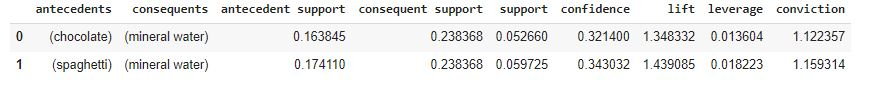

หลังจากนั้นให้ทำการวิเคราะห์ข้อมูลจากกราฟเพื่อแสดงขายสินค้า 20 รายการที่ขายดีที่สุด ดังภาพ
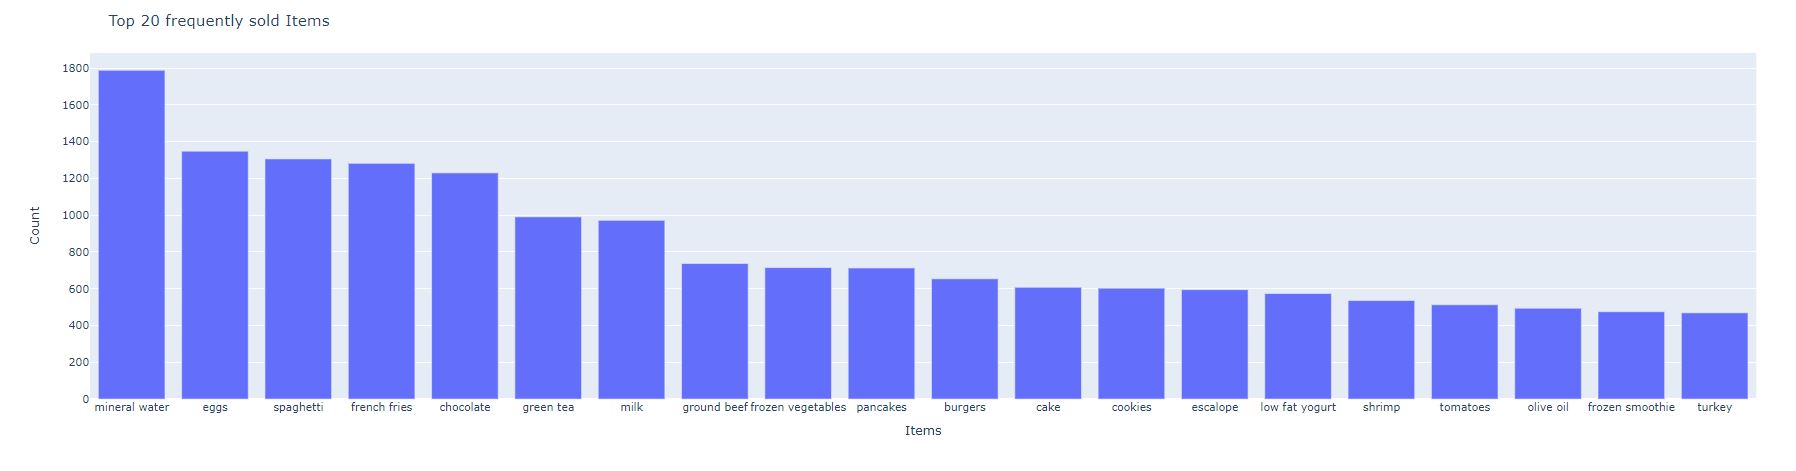

In [73]:
import pandas as pd
import numpy as np
import os # use commandline
from google.colab import files
import io
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['test_retail.csv']),names=['products'], header=None )
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Saving test_retail.csv to test_retail.csv


,products
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [74]:
df.values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'],
       ['burgers,meatballs,eggs'],
       ['chutney'],
       ...,
       ['chicken'],
       ['escalope,green tea'],
       ['eggs,frozen smoothie,yogurt cake,low fat yogurt']], dtype=object)

In [75]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(7501, 1)

In [76]:
# Step1: I converted the data into list format. I separated the objects in each line with ','.
data = list(df["products"].apply(lambda x : x.split(',')))
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [77]:
!pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [78]:
# Step2: I will apply the method of converting the data of mlxtend library into True-False
# dataframe.
# First, I install the mlxtend library for those who do not have it installed.

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data,columns=te.columns_)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,escalope,extra dark chocolate,flax seed,french fries,french wine,fresh bread,fresh tuna,fromage blanc,frozen smoothie,frozen vegetables,gluten free bar,grated cheese,green beans,green grapes,green tea,ground beef,gums,ham,hand protein bar,herb & pepper,honey,hot dogs,ketchup,light cream,light mayo,low fat yogurt,magazines,mashed potato,mayonnaise,meatballs,melons,milk,mineral water,mint,mint green tea,muffins,mushroom cream sauce,napkins,nonfat milk,oatmeal,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [79]:
from mlxtend.frequent_patterns import apriori
freq_items = apriori(df,min_support=0.05,use_colnames = True) #ทดลองเปลี่ยนค่า min_support
freq_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [80]:
from mlxtend.frequent_patterns import association_rules
df_res = association_rules(freq_items, metric = "confidence", min_threshold = 0.3) #ทดลองเปลี่ยนค่า confidence
df_res

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
1,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437


In [81]:
conf_max = df_res['confidence'].max()
conf_max

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0.3430321592649311

In [82]:
conf_min = df_res["confidence"].min()
conf_min

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0.3213995117982099

In [83]:
df_res.sort_values("lift",ascending = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
1,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437


In [84]:
df_filt = df_res[ (df_res["lift"] >= 1) & ((df_res["confidence"] == conf_max) | (df_res["confidence"] == 0.5 ))]
df_filt.sort_values("confidence", ascending = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(spaghetti),(mineral water),0.17411,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437


In [85]:
df_res

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
1,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437


In [86]:
from mlxtend.frequent_patterns import apriori

# หา frequent itemsets ด้วยค่า support เฉลี่ย
freq_items = apriori(df, min_support=0.05, use_colnames=True)

# เรียงลำดับตามค่า support และเลือกเอา 20 รายการแรก
top_freq_items = freq_items.sort_values(by='support', ascending=False).head(20)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



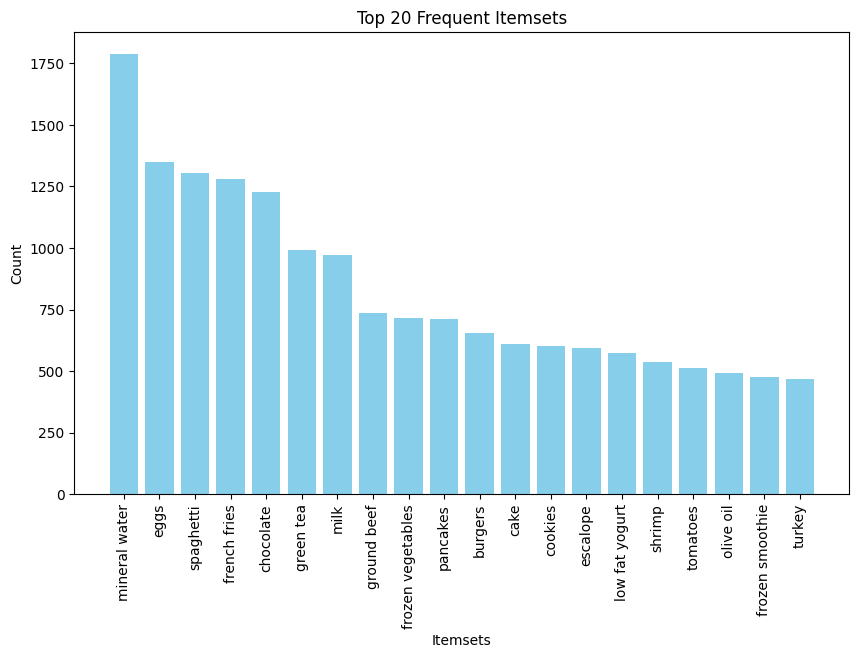

In [89]:
import matplotlib.pyplot as plt

# Convert itemsets to strings and remove 'frozenset' prefix
top_freq_items['itemsets'] = top_freq_items['itemsets'].apply(lambda x: ', '.join(list(x)).replace('frozenset({', '').replace('})', ''))

# Calculate counts by multiplying support by the total number of transactions
top_freq_items['count'] = top_freq_items['support'] * len(df)

plt.figure(figsize=(10, 6))
plt.bar(top_freq_items['itemsets'], top_freq_items['count'], color='skyblue')
plt.xlabel('Itemsets')
plt.ylabel('Count')
plt.title('Top 20 Frequent Itemsets')
plt.xticks(rotation=90)
plt.show()
